In [36]:
# 14/01/2022
# Francisco Domínguez Mateos
# pyTorch psr3d Indra 

In [52]:
import os
import matplotlib.pyplot as plt
import torch
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.distributions as distributions
import torch.nn.functional as F

def plot(xs, ys, xlim=(-3, 3), ylim=(-3, 3)):
  fig, ax = plt.subplots()
  ax.plot(xs, ys, linewidth=5)
  # ax.set_aspect('equal')
  ax.grid(True, which='both')
  
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.set_xlim(*xlim)
  ax.set_ylim(*ylim)

In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [39]:
# D=3 N=4
x=torch.Tensor(([1,.25,0.26],[0.75,0.125,0.1],[0.5,0.25,0.12],[0.65,0.135,0.2])).to(device)
print(x)

tensor([[1.0000, 0.2500, 0.2600],
        [0.7500, 0.1250, 0.1000],
        [0.5000, 0.2500, 0.1200],
        [0.6500, 0.1350, 0.2000]], device='cuda:0')


In [40]:
y=torch.Tensor(([[1],[0],[0],[1]])).to(device)
print(y)

tensor([[1.],
        [0.],
        [0.],
        [1.]], device='cuda:0')


In [41]:
class Net(nn.Module):
    def __init__(self,input_size,output_size):
        super(Net,self).__init__()
        self.fc1=nn.Linear(input_size,32)
        self.fc2=nn.Linear(32,32)
        self.fc3=nn.Linear(32,output_size)
    def forward(self,x):
        h1=F.relu(self.fc1(x))
        h2=F.relu(self.fc2(h1))
        y =torch.sigmoid(self.fc3(h2))
        return y

In [42]:
loss_fn=nn.BCELoss()
#loss_fn=nn.MSELoss()

In [46]:
net=Net(input_size=x.shape[1],output_size=y.shape[1]).to(device)
optimizer=optim.Adam(net.parameters(),lr=1e-3)

In [47]:
losses=[]
for i in range(1000):
    f=net(x)
    loss=loss_fn(f,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 10==0:
        losses.append(loss)
    if i % 100==0:
        print(i,loss)

0 tensor(0.6936, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)
100 tensor(0.5493, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)
200 tensor(0.3321, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)
300 tensor(0.1750, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)
400 tensor(0.0656, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)
500 tensor(0.0274, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)
600 tensor(0.0144, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)
700 tensor(0.0088, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)
800 tensor(0.0059, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)
900 tensor(0.0042, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


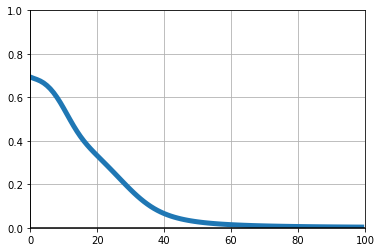

In [48]:
plot(np.arange(0,len(losses)),np.array(losses),(0,100),(0,1))

In [55]:
class DatasetPSR3D(torch.utils.data.Dataset):
    def __init__(self, foldername):
        self.fileNames=[]
        self.currentFileName=""
        self.num_samples=0
        for fname in os.listdir(foldername):
            fileName=os.path.join(foldername,fname)
            self.fileNames.append(fileName)
            self.workOut_num_samples(fileName)
    def workOut_num_samples(self,fileName):
        #open fileName and workout num rows
        num_rows=0 #not true
        self.num_samples+=num_rows
    def get_num_samples(self):
        return self.num_samples
    def __len__(self):
        return 1
    def __getitem__(self, idx):
        #take a row from files in self.fileNames
        return x, y

In [58]:
dataset=DatasetPSR3D(".")
batch_size=10000
data_loader=torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=batch_size)

In [63]:
losses=[]
for i in range(1000):
    for x, y in data_loader:
        x.to(device)
        f=net(x)
        loss=loss_fn(f,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if i % 10==0:
        losses.append(loss)
    if i % 100==0:
        print(i,loss)

0 tensor(0.0032, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)


RuntimeError: shape '[32]' is invalid for input of size 1